<a href="https://colab.research.google.com/github/JulioFMDB/portfolio/blob/main/SVM_Estudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='section-zero'></a>

**Por Júlio Felipe Monteiro De Bem De Bem**

**[My LinkedIn](https://www.linkedin.com/in/juliodebem/)**

**[My GitHub](https://github.com/JulioFMDB)**

**[My personal Instagram](https://www.instagram.com/juliodebem)**


# *Support Vector Machines* - SVM (Máquina de Vetores de Suporte)

**Objetivos**: Aprender o que é SVM usando a biblioteca `Scikit-Learn`. Introduzir a técnica e os diferentes tipos de *kernels*.

## O que é SVM?

SVM é uma técnica de aprendizado supervisionado que encontra um hiperplano de separação entre os dados. Esta separação busca minimizar uma função custo maximizando a distância entre os pontos, assim separando-os de maneira mais eficiente. O hiperplano de separação pode ser linear ou não dependendo do kernel.


<img src="images/support-vector-machines.png" alt="support-vector-machines" width="800"/>

## Classificação e Regressão

* Classificação: [`sklearn.svm.SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* Regressão: [`sklearn.svm.SVR()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

## Hiperparâmetro $C$

Quanto **menor** $C$ mais **tolerante** (e ampla) serão as **margens dos hiperplanos** de separação e mais **flexível** o modelo.

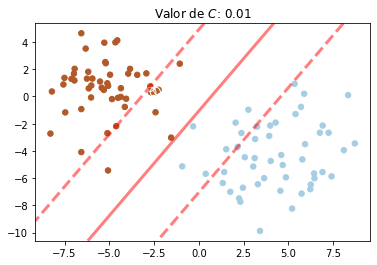

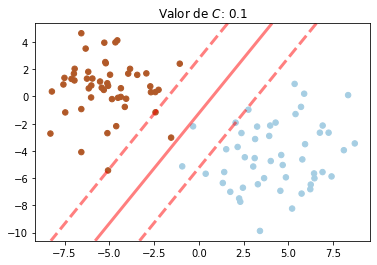

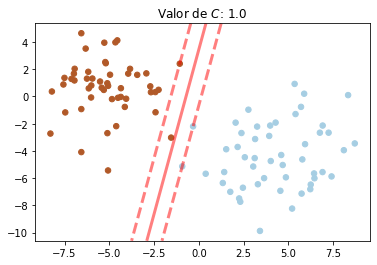

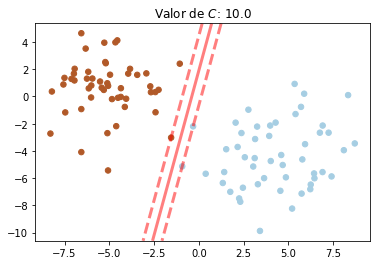

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
#from jupyterthemes import jtplot
#jtplot.style()


# Criação de 100 pontos separáveis
X, y = make_blobs(n_samples=100, centers=2,
                  cluster_std=2, random_state=123)

# Implementando SVM linear para níveis diferentes de C
for C in [1e-2, 1e-1, 1e0, 1e1]:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    
    plt.figure()
    plt.clf()
    plt.grid(False)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='red', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'], linewidths=3)
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='w')
    plt.title(f"Valor de $C$: {C}")
plt.show()

## 3 tipos de Kernels

* Linear
* Radial
* Polinomial

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Somente pegar as duas primeiras features para plotar em 2-D
X = X[y != 0, :2]
y = y[y != 0]

In [38]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

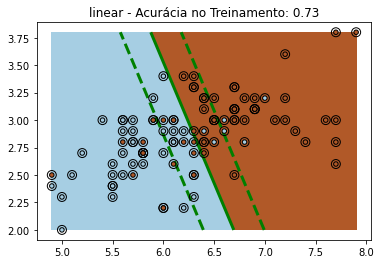

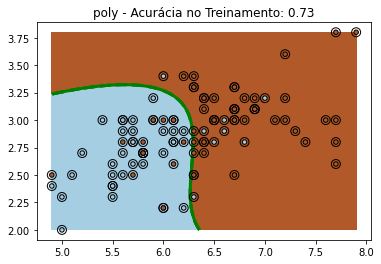

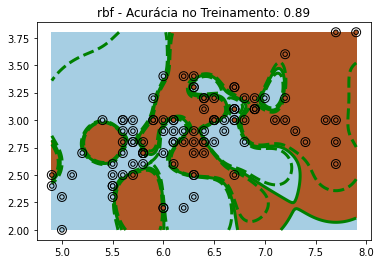

In [39]:
for kernel in ['linear', 'poly', 'rbf']:  # rbf - radial basis function
    clf = SVC(kernel=kernel, gamma=10, C=1e4)
    clf.fit(X, y)

    plt.figure()
    plt.clf()
    plt.grid(False)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Denotar com circulo o test set
    plt.scatter(X[:, 0], X[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Colocar o resultado num plot colorido
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading='auto')
    plt.contour(XX, YY, Z, colors='g', linewidths=3,
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    
    # Gerar previsoes no Train Set
    y_pred = clf.predict(X)
    acc = round(accuracy_score(y, y_pred), 3)

    plt.title(kernel + f" - Acurácia no Treinamento: {acc}")
plt.show()

## Pré-processamento dos Dados

SVM é extremamente sensível a dados não padronizados. Portanto é importante padronizar para que todas as variáveis preditoras tenham média $0$ e desvio padrão $1$.

Para isso, usamos a função [`sklearn.preprocessing.StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [40]:
# Criação de 10.000 pontos separáveis
X, y = make_blobs(n_samples=10000, centers=2,
                  cluster_std=2, random_state=123)

In [41]:
%%time
clf = SVC(C=0.1, kernel='rbf', gamma=10)
clf.fit(X, y)

CPU times: user 4.76 s, sys: 91 ms, total: 4.85 s
Wall time: 4.84 s


SVC(C=0.1, gamma=10)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [43]:
%%time
clf = SVC(C=0.1, kernel='rbf', gamma=10)
clf.fit(X, y)

CPU times: user 993 ms, sys: 6.96 ms, total: 1 s
Wall time: 1 s


SVC(C=0.1, gamma=10)

## Exemplo com o Dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1` 
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

<img src="images/titanic.png" alt="titanic" style="width: 500px;"/>

In [44]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=feature_names, inplace=True)  #891 para 714

X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [45]:
# Normalizando as variáveis preditoras
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### SVM de Classificação
Usar a função do Scikit-Learn [`sklearn.svm.SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

#### Argumentos:
* `C` - `float` - Hyperparâmetro de Regularização (tem que ser positivo)
* `kernel` - `str` - Tipo do Kernel
    * `linear` - Kernel Linear
    * `poly` -  Kernel Polinomial
    * `rbf` -  Kernel Radial (**padrão**)
* `gamma` - Coeficiente de Kernel para `poly` e `rbf`
    * Padrão - `scale`
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

#### Retorna:
* Objeto `estimator` do Scikit-Learn

### SVM de Regressão
Usar a função do Scikit-Learn [`sklearn.svm.LinearSVR()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html)

#### Argumentos:
* `C` - `float` - Hyperparâmetro de Regularização (tem que ser positivo)
* `kernel` - `str` - Tipo do Kernel
    * `linear` - Kernel Linear
    * `poly` -  Kernel Polinomial
    * `rbf` -  Kernel Radial (**padrão**)
* `gamma` - Coeficiente de Kernel para `poly` e `rbf`
    * Padrão - `scale`
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

#### Retorna:
* Objeto `estimator` do Scikit-Learn

In [46]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=10, random_state=123)
clf.fit(X_train, y_train)

SVC(C=10, kernel='linear', random_state=123)

### Acurácia do Modelo
Usar a função do Scikit-Learn [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

Retorna um score de acurácia `float` entre $0$ e $1$

#### Argumentos
* `y_true`: Classes Verdadeiras
    * 2 classes: vetor (1-D)
    * Mais que 2 classes: matriz (2-D)
* `y_pred`: Classes Previstas pelo Modelo
    * 2 classes: vetor (1-D)
    * Mais que 2 classes: matriz (2-D)
    
> Obs: Regressão Logística acurácias: 0.69 Treino e 0.7 Teste

In [47]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.79

 ---------------------------

Acurácia de Teste: 0.75


## Testando vários *kernels*

In [48]:
from sklearn.svm import SVC
for kernel in ['linear', 'poly', 'rbf']:
    clf_kernel = SVC(kernel=kernel, C=10, random_state=123)
    clf_kernel.fit(X_train, y_train)
    print(f"Acurácia de teste - Kernel {kernel}: {round(clf_kernel.score(X_test, y_test), 3)}")

Acurácia de teste - Kernel linear: 0.754
Acurácia de teste - Kernel poly: 0.788
Acurácia de teste - Kernel rbf: 0.827


## Atividade - SVM com o dataset [Iris](https://scikit-learn.org/stable/datasets/index.html#iris-dataset)

Edgar Anderson coletou os dados para quantificar a variação morfológica das flores de íris de três espécies relacionadas.

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris (Setosa, Virginica e Versicolor). Quatro características foram medidas em cada amostra (cm):

* $N = 150$
* Atributos: 4
    * `sepal length (cm)` - Cumprimento da Sépala
    * `sepal width (cm)` - Largura da Sépala
    * `petal length (cm)` - Cumprimento da Pétala
    * `petal width (cm)` - Largua da Sépala
* Variável dependente: Tipo de espécie de Iris
    * `0` - Setosa
    * `1` - Virginica
    * `2` - Versicolor 

* Achar a acurácia do modelo para os dados de teste

>Obs: usar `test_size = 0.25` e `random_state = 123`

<img src="images/iris-species.png" alt="iris-sepals-petals" style="width: 600px;"/>

In [49]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

In [50]:
print('Nomes dos Atributos: ', iris['feature_names'])
print('Tamanho de X: ', X.shape,)
print('Tamanho de y: ', y.shape,)

Nomes dos Atributos:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Tamanho de X:  (150, 4)
Tamanho de y:  (150,)


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=123)
# Normalizando as variáveis preditoras
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (112, 4)
Tamanho de X_test:  (38, 4)
Tamanho de y_train:  (112,)
Tamanho de y_test:  (38,)


#Regressão logistica

In [53]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(n_jobs=-1, random_state=123)

In [54]:
clf.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=123)

# Kernel Linear

In [55]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=10, random_state=123)
clf.fit(X_train, y_train)

SVC(C=10, kernel='linear', random_state=123)

In [56]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.99

 ---------------------------

Acurácia de Teste: 0.97


In [57]:
print('Nomes dos Atributos: ', iris['feature_names'], '\n')
print('Tamanho de X: ', X.shape, '\n')
print('Tamanho de y: ', y.shape, '\n')

Nomes dos Atributos:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

Tamanho de X:  (150, 4) 

Tamanho de y:  (150,) 



In [58]:
y_test_pred

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0])

# Kernel Polynomial

In [59]:
from sklearn.svm import SVC

clf = SVC(kernel='poly', C=10, random_state=123)
clf.fit(X_train, y_train)

SVC(C=10, kernel='poly', random_state=123)

In [60]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.98

 ---------------------------

Acurácia de Teste: 0.92


In [61]:
y_test_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0])

# Kernel Radial

In [62]:
from sklearn.svm import SVC

clf = SVC(kernel='poly', C=10, random_state=123)
clf.fit(X_train, y_train)

SVC(C=10, kernel='poly', random_state=123)

In [63]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=10, random_state=123)
clf.fit(X_train, y_train)

SVC(C=10, random_state=123)

In [64]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.98

 ---------------------------

Acurácia de Teste: 0.97


# SVR - Sigmoid

In [65]:
from sklearn.svm import SVR #(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

In [66]:
clf = SVR(kernel='sigmoid', C=10)
clf.fit(X_train, y_train)

SVR(C=10, kernel='sigmoid')

In [67]:
print('Nomes dos Atributos: ', iris['feature_names'], '\n')
print('Tamanho de X: ', X.shape, '\n')
print('Tamanho de y: ', y.shape, '\n')

Nomes dos Atributos:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

Tamanho de X:  (150, 4) 

Tamanho de y:  (150,) 



In [68]:
y_pred

array([1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2])

# Base Boston


In [69]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston['data']
y = boston['target']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [70]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [71]:
X.shape

(506, 13)

In [72]:
X[0].mean()

62.37687076923077

In [73]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [74]:
# depois de analisar o X, tomarei a decisao de padronizao ou nao (decidido ao checar a media da feature)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Criar as bases de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=123)

# Normalizando as variáveis preditoras
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
X_train.mean()

2.31607800615125e-15

In [76]:
# Instanciamento dos modelos
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [77]:
# Treinar o modelo em 3 kernels (linear, polynomial e radial)
svr_rbf.fit(X_train,y_train)
svr_lin.fit(X_train,y_train)
svr_poly.fit(X_train,y_train)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [78]:
# Verificar o erro
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_svr_rbf = svr_rbf.predict(X_test)
y_pred_svr_lin = svr_lin.predict(X_test)
y_pred_svr_poly = svr_poly.predict(X_test)

print(f"MSE de Teste RBF: {mean_squared_error(y_test, y_pred_svr_rbf):1.1f}")
print(f"MAE de Teste RBF: {mean_absolute_error(y_test, y_pred_svr_rbf):1.1f}\n")

print(f"MSE de Teste Lin: {mean_squared_error(y_test, y_pred_svr_lin):1.1f}")
print(f"MAE de Teste Lin: {mean_absolute_error(y_test, y_pred_svr_lin):1.1f}\n")

print(f"MSE de Teste Poly: {mean_squared_error(y_test, y_pred_svr_poly):1.1f}")
print(f"MAE de Teste Poly: {mean_absolute_error(y_test, y_pred_svr_poly):1.1f}")

MSE de Teste RBF: 14.3
MAE de Teste RBF: 2.5

MSE de Teste Lin: 28.4
MAE de Teste Lin: 3.3

MSE de Teste Poly: 28.5
MAE de Teste Poly: 3.0


In [79]:
# Verificando score dos 3 kernels
print(svr_rbf.score(X_test, y_test))
print(svr_lin.score(X_test, y_test))
print(svr_poly.score(X_test, y_test))

0.8186687311509757
0.6400498025964358
0.6390314362738203


In [80]:
X_case = scaler.transform([[2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [81]:
y_case = svr_rbf.predict(X_case)

In [82]:
y_case # Valor da casa multiplicado pelo y_case, este será o valor da casa

array([21.93053426])

# Base Diabetes

In [83]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes['data']
y = diabetes['target']

In [84]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [85]:
X.mean()

-1.6638274468590581e-16

In [86]:
from sklearn.model_selection import train_test_split

# Criar as bases de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=1500)

# Base já normalizada

In [87]:
svr_rbf = SVR(kernel="rbf", C=10000, gamma=0.9, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=10000, gamma="auto")
svr_poly = SVR(kernel="poly", C=10000, gamma="auto", degree=4, epsilon=0.1, coef0=1)

In [88]:
svr_rbf.fit(X_train,y_train)
svr_lin.fit(X_train,y_train)
svr_poly.fit(X_train,y_train)

SVR(C=10000, coef0=1, degree=4, gamma='auto', kernel='poly')

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_svr_rbf = svr_rbf.predict(X_test)
y_pred_svr_lin = svr_lin.predict(X_test)
y_pred_svr_poly = svr_poly.predict(X_test)

print(f"MSE de Teste RBF: {mean_squared_error(y_test, y_pred_svr_rbf):1.1f}")
print(f"MAE de Teste RBF: {mean_absolute_error(y_test, y_pred_svr_rbf):1.1f}\n")

print(f"MSE de Teste Lin: {mean_squared_error(y_test, y_pred_svr_lin):1.1f}")
print(f"MAE de Teste Lin: {mean_absolute_error(y_test, y_pred_svr_lin):1.1f}\n")

print(f"MSE de Teste Poly: {mean_squared_error(y_test, y_pred_svr_poly):1.1f}")
print(f"MAE de Teste Poly: {mean_absolute_error(y_test, y_pred_svr_poly):1.1f}")

MSE de Teste RBF: 2609.4
MAE de Teste RBF: 40.2

MSE de Teste Lin: 2722.6
MAE de Teste Lin: 41.6

MSE de Teste Poly: 2700.8
MAE de Teste Poly: 41.5


In [90]:
print(svr_rbf.score(X_test, y_test))
print(svr_lin.score(X_test, y_test))
print(svr_poly.score(X_test, y_test))

0.5381721156409893
0.5181376060051697
0.5219999585815174


In [91]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [92]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59